In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
import matplotlib.pyplot as plt

## 1. Short distance problem

In [3]:
# nonlinear and long-distance dataset
# test long-distance vs. short-distance patterns

# start with a small T and increase it later
T = 10
D = 1
X = []
Y = []


In [4]:
def get_label(x, i1, i2, i3):
    # x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)    # generate x
    X.append(x)
    y = get_label(x, -1, -2, -3)   # short distance
#     y = get_label(x, 0, 1, 2)      # long distance
    Y.append(y)

In [5]:
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [6]:
X.shape, Y.shape

((5000, 10), (5000,))

### 1.1. Try a linear model - classification model

In [9]:
i = Input(shape=(T, ))
x = Dense(1, activation='sigmoid')(i)

model = Model(i,x)

2024-07-19 04:34:07.845387: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.01),
             metrics=['accuracy'])

In [11]:
# train the model
r = model.fit(X, Y,
             epochs=100,
             validation_split=0.5)

Epoch 1/100
79/79 [==============================] - 1s 4ms/step - loss: 0.7382 - accuracy: 0.5052 - val_loss: 0.6997 - val_accuracy: 0.5228
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5004 - val_loss: 0.6956 - val_accuracy: 0.5084
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5048 - val_loss: 0.6937 - val_accuracy: 0.5216
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5152 - val_loss: 0.6939 - val_accuracy: 0.5088
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4928 - val_loss: 0.6938 - val_accuracy: 0.5108
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5044 - val_loss: 0.6942 - val_accuracy: 0.5236
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5064 - val_loss: 0.6947 - val_accuracy: 0.5040
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5004 - val_loss: 0.6936 - val_accuracy: 0.5180
Epoch 60/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5140 - val_loss: 0.6936 - val_accuracy: 0.5084
Epoch 61/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5116 - val_loss: 0.6947 - val_accuracy: 0.5024
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4876 - val_loss: 0.6932 - val_accuracy: 0.5184
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5036 - val_loss: 0.6942 - val_accuracy: 0.5216
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5052
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5088 - val_loss: 0.6947 - val_accuracy: 0.5176
Epoch 

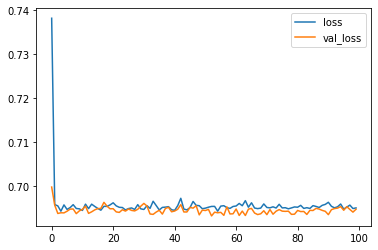

In [12]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

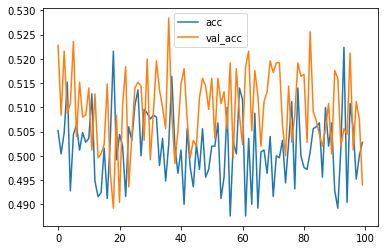

In [13]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### 1.2. Try a simple RNN / LSTM / GRU

In [34]:
inputs = np.expand_dims(X, -1)

In [35]:
inputs.shape, X.shape

((5000, 10, 1), (5000, 10))

In [54]:
# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [59]:
# compile
model.compile(loss='binary_crossentropy',
#             optimizer='rmsprop',
            # optimizer='adam',
            optimizer=Adam(learning_rate=0.01),
#             optimizer=SGD(learning_rate=0.1, momentum=0.9),
            metrics=['accuracy'],)

In [60]:
# train
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 15ms/step - loss: 0.6956 - accuracy: 0.5368 - val_loss: 0.6928 - val_accuracy: 0.5636
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6914 - accuracy: 0.5476 - val_loss: 0.6916 - val_accuracy: 0.5072
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6754 - accuracy: 0.5816 - val_loss: 0.6420 - val_accuracy: 0.6532
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.5231 - accuracy: 0.7704 - val_loss: 0.4048 - val_accuracy: 0.8564
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.3068 - accuracy: 0.9048 - val_loss: 0.2286 - val_accuracy: 0.9320
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.1992 - accuracy: 0.9372 - val_loss: 0.1654 - val_accuracy: 0.9512
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.1479 - accuracy: 0.9584 - val_loss: 0.1283 - val_accuracy: 0.9612
Epoch 8

79/79 [==============================] - 1s 9ms/step - loss: 0.0117 - accuracy: 0.9980 - val_loss: 0.0271 - val_accuracy: 0.9936
Epoch 59/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.0235 - val_accuracy: 0.9944
Epoch 60/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0303 - val_accuracy: 0.9924
Epoch 61/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0156 - accuracy: 0.9928 - val_loss: 0.0276 - val_accuracy: 0.9924
Epoch 62/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0323 - val_accuracy: 0.9916
Epoch 63/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0270 - val_accuracy: 0.9924
Epoch 64/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0091 - accuracy: 0.9984 - val_loss: 0.0297 - val_accuracy: 0.9920
Epoch 65/200
79/79 

79/79 [==============================] - 1s 9ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.0269 - val_accuracy: 0.9932
Epoch 116/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0239 - val_accuracy: 0.9944
Epoch 117/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0278 - val_accuracy: 0.9924
Epoch 118/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.0237 - val_accuracy: 0.9940
Epoch 119/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0260 - val_accuracy: 0.9944
Epoch 120/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0281 - val_accuracy: 0.9936
Epoch 121/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0270 - val_accuracy: 0.9940
Epoch 122/200

79/79 [==============================] - 1s 10ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0230 - val_accuracy: 0.9948
Epoch 173/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0197 - val_accuracy: 0.9952
Epoch 174/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0298 - val_accuracy: 0.9936
Epoch 175/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0260 - val_accuracy: 0.9952
Epoch 176/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0276 - val_accuracy: 0.9944
Epoch 177/200
79/79 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0266 - val_accuracy: 0.9948
Epoch 178/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0261 - val_accuracy: 0.9948
Epoch 179/

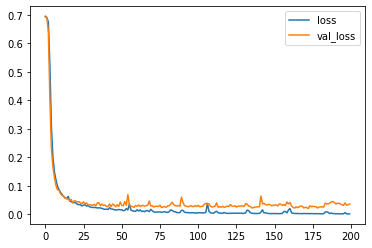

In [61]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

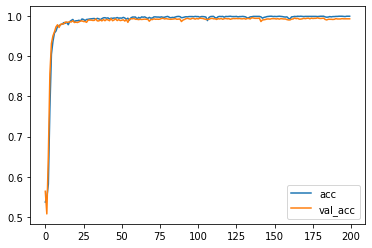

In [62]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## 2. Long distance problem

In [63]:
# nonlinear and long-distance dataset
# test long-distance vs. short-distance patterns

# start with a small T and increase it later
T = 10
D = 1
X = []
Y = []


In [64]:
def get_label(x, i1, i2, i3):
    # x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)    # generate x
    X.append(x)
#     y = get_label(x, -1, -2, -3)   # short distance
    y = get_label(x, 0, 1, 2)      # long distance
    Y.append(y)

In [65]:
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [66]:
X.shape, Y.shape

((5000, 10), (5000,))

### 2.1. Try a simple RNN / LSTM / GRU

In [67]:
inputs = np.expand_dims(X, -1)

In [68]:
inputs.shape, X.shape

((5000, 10, 1), (5000, 10))

In [74]:
# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [75]:
# compile
model.compile(loss='binary_crossentropy',
#             optimizer='rmsprop',
            # optimizer='adam',
            optimizer=Adam(learning_rate=0.01),
#             optimizer=SGD(learning_rate=0.1, momentum=0.9),
            metrics=['accuracy'],)

In [76]:
# train
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 15ms/step - loss: 0.6938 - accuracy: 0.5096 - val_loss: 0.6944 - val_accuracy: 0.4876
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5080 - val_loss: 0.6956 - val_accuracy: 0.4824
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6927 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5164
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6926 - accuracy: 0.5244 - val_loss: 0.6934 - val_accuracy: 0.5116
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5160 - val_loss: 0.6941 - val_accuracy: 0.5084
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5064 - val_loss: 0.6930 - val_accuracy: 0.5044
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6917 - accuracy: 0.5180 - val_loss: 0.6943 - val_accuracy: 0.5120
Epoch 8/200


Epoch 59/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0955 - accuracy: 0.9728 - val_loss: 0.1275 - val_accuracy: 0.9608
Epoch 60/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0968 - accuracy: 0.9720 - val_loss: 0.1310 - val_accuracy: 0.9592
Epoch 61/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0895 - accuracy: 0.9756 - val_loss: 0.1333 - val_accuracy: 0.9608
Epoch 62/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0877 - accuracy: 0.9776 - val_loss: 0.1374 - val_accuracy: 0.9616
Epoch 63/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0886 - accuracy: 0.9740 - val_loss: 0.1261 - val_accuracy: 0.9616
Epoch 64/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0958 - accuracy: 0.9740 - val_loss: 0.1291 - val_accuracy: 0.9632
Epoch 65/200
79/79 [==============================] - 1s 9ms/step - loss: 0.1033 - accuracy: 0.9724 - val_loss: 0.1261 - val_accuracy: 0.9644
Epoch 

79/79 [==============================] - 1s 10ms/step - loss: 0.0545 - accuracy: 0.9852 - val_loss: 0.0945 - val_accuracy: 0.9752
Epoch 117/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0591 - accuracy: 0.9848 - val_loss: 0.1354 - val_accuracy: 0.9672
Epoch 118/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0523 - accuracy: 0.9864 - val_loss: 0.1124 - val_accuracy: 0.9720
Epoch 119/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0498 - accuracy: 0.9868 - val_loss: 0.0873 - val_accuracy: 0.9792
Epoch 120/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0621 - accuracy: 0.9836 - val_loss: 0.0931 - val_accuracy: 0.9760
Epoch 121/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0686 - accuracy: 0.9796 - val_loss: 0.1292 - val_accuracy: 0.9644
Epoch 122/200
79/79 [==============================] - 1s 10ms/step - loss: 0.0655 - accuracy: 0.9832 - val_loss: 0.0979 - val_accuracy: 0.9780
Epoch 12

79/79 [==============================] - 1s 9ms/step - loss: 0.0345 - accuracy: 0.9932 - val_loss: 0.0873 - val_accuracy: 0.9796
Epoch 174/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0346 - accuracy: 0.9924 - val_loss: 0.0886 - val_accuracy: 0.9804
Epoch 175/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0337 - accuracy: 0.9932 - val_loss: 0.0881 - val_accuracy: 0.9804
Epoch 176/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0366 - accuracy: 0.9924 - val_loss: 0.0851 - val_accuracy: 0.9800
Epoch 177/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0474 - accuracy: 0.9892 - val_loss: 0.0956 - val_accuracy: 0.9788
Epoch 178/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0631 - accuracy: 0.9812 - val_loss: 0.0986 - val_accuracy: 0.9760
Epoch 179/200
79/79 [==============================] - 1s 9ms/step - loss: 0.0436 - accuracy: 0.9884 - val_loss: 0.0717 - val_accuracy: 0.9812
Epoch 180/200

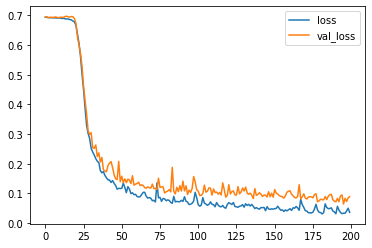

In [77]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

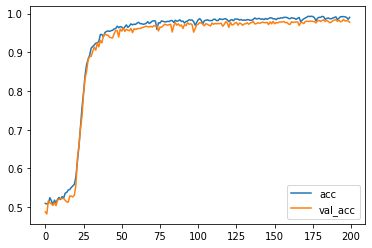

In [78]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## 3. Extend sequence length to 20

In [100]:
# nonlinear and long-distance dataset
# test long-distance vs. short-distance patterns

# start with a small T and increase it later
T = 30
D = 1
X = []
Y = []


In [101]:
def get_label(x, i1, i2, i3):
    # x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)    # generate x
    X.append(x)
#     y = get_label(x, -1, -2, -3)   # short distance
    y = get_label(x, 0, 1, 2)      # long distance
    Y.append(y)

In [102]:
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [103]:
X.shape, Y.shape

((5000, 30), (5000,))

### 3.1. Try a simple RNN / LSTM / GRU (longer sequence, with GlobalMaxPool)

In [109]:
inputs = np.expand_dims(X, -1)

In [110]:
inputs.shape, X.shape

((5000, 30, 1), (5000, 30))

In [111]:
# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)                  # apply to all the hidden states returned (instead of using the last hidden state)

x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [112]:
# compile
model.compile(loss='binary_crossentropy',
#             optimizer='rmsprop',
            # optimizer='adam',
            optimizer=Adam(learning_rate=0.01),
#             optimizer=SGD(learning_rate=0.1, momentum=0.9),
            metrics=['accuracy'],)

In [113]:
# train
r = model.fit(
    inputs, Y,
    epochs=100,
#     epochs=200,
#     epochs=400,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 4s 25ms/step - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.6936 - val_accuracy: 0.4924
Epoch 2/100
79/79 [==============================] - 2s 19ms/step - loss: 0.6935 - accuracy: 0.4976 - val_loss: 0.6941 - val_accuracy: 0.4876
Epoch 3/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6927 - accuracy: 0.5244 - val_loss: 0.6973 - val_accuracy: 0.4936
Epoch 4/100
79/79 [==============================] - 1s 19ms/step - loss: 0.6926 - accuracy: 0.5132 - val_loss: 0.6942 - val_accuracy: 0.4764
Epoch 5/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6937 - accuracy: 0.4996 - val_loss: 0.6953 - val_accuracy: 0.4932
Epoch 6/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6919 - accuracy: 0.5216 - val_loss: 0.6955 - val_accuracy: 0.4868
Epoch 7/100
79/79 [==============================] - 1s 19ms/step - loss: 0.6908 - accuracy: 0.5304 - val_loss: 0.6972 - val_accuracy: 0.4956
Epoch 

79/79 [==============================] - 1s 16ms/step - loss: 0.2066 - accuracy: 0.9116 - val_loss: 0.2238 - val_accuracy: 0.9052
Epoch 59/100
79/79 [==============================] - 1s 16ms/step - loss: 0.2126 - accuracy: 0.9096 - val_loss: 0.2364 - val_accuracy: 0.9032
Epoch 60/100
79/79 [==============================] - 1s 17ms/step - loss: 0.2075 - accuracy: 0.9092 - val_loss: 0.2237 - val_accuracy: 0.9076
Epoch 61/100
79/79 [==============================] - 1s 17ms/step - loss: 0.2009 - accuracy: 0.9136 - val_loss: 0.2206 - val_accuracy: 0.9104
Epoch 62/100
79/79 [==============================] - 1s 16ms/step - loss: 0.1948 - accuracy: 0.9148 - val_loss: 0.2190 - val_accuracy: 0.9088
Epoch 63/100
79/79 [==============================] - 1s 16ms/step - loss: 0.1917 - accuracy: 0.9180 - val_loss: 0.2195 - val_accuracy: 0.9084
Epoch 64/100
79/79 [==============================] - 1s 16ms/step - loss: 0.1943 - accuracy: 0.9144 - val_loss: 0.2175 - val_accuracy: 0.9120
Epoch 65/100

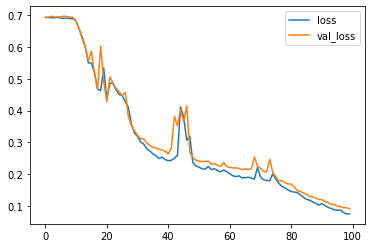

In [114]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

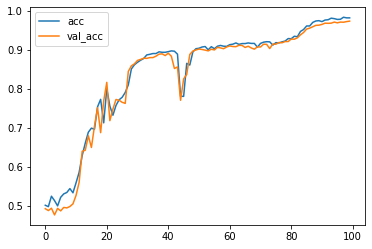

In [115]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()